In [1]:
import pandas as pd 
import numpy as np 
import datetime as dt 
import random 
import matplotlib.pyplot as plt 
from numpy.polynomial.polynomial import polyfit
import time
%matplotlib inline 

Read the file, strip the white columns and check the info.

In [2]:
rc = pd.read_csv('rollercoaster.csv')
rc.columns = rc.columns.str.strip()
rc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 20 columns):
Name                        300 non-null object
Park                        300 non-null object
City/Region                 300 non-null object
City/State/Region           300 non-null object
Country/Region              300 non-null object
Geographic Region           300 non-null object
Construction                300 non-null object
Type                        300 non-null object
Status                      300 non-null object
Year/Date Opened            300 non-null int64
Height (feet)               299 non-null object
Speed (mph)                 296 non-null float64
Length (feet)               295 non-null float64
Inversions (YES or NO)      300 non-null object
Number of Inversions        300 non-null int64
Drop (feet)                 142 non-null object
Duration (min:sec)          224 non-null object
G Force                     83 non-null object
Vertical Angle (degrees)    91 n

From the info report, we noticed that the columns "Drop(feet)", "G Force", "Vertical Angle (degrees)" and "CoasterBuzz Ranking" have fewer than half of the non-null data. So we decide to get rid of these columns.

In [3]:
rc = rc.drop(columns = ['Drop (feet)', 'G Force', 'Vertical Angle (degrees)'])


rc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
Name                      300 non-null object
Park                      300 non-null object
City/Region               300 non-null object
City/State/Region         300 non-null object
Country/Region            300 non-null object
Geographic Region         300 non-null object
Construction              300 non-null object
Type                      300 non-null object
Status                    300 non-null object
Year/Date Opened          300 non-null int64
Height (feet)             299 non-null object
Speed (mph)               296 non-null float64
Length (feet)             295 non-null float64
Inversions (YES or NO)    300 non-null object
Number of Inversions      300 non-null int64
Duration (min:sec)        224 non-null object
CoasterBuzz Ranking       69 non-null float64
dtypes: float64(3), int64(2), object(12)
memory usage: 40.0+ KB


In [4]:
# finding rows with missing values
rc[(rc['Height (feet)'].isnull() == True) | (rc['Speed (mph)'].isnull() == True) | (rc['Length (feet)'].isnull() == True) | (rc['Duration (min:sec)'].isnull() == True)]
                                                                                                                                
                                                                                                                                
                                                                                                                                
                                                                                                                                

,Name,Park,City/Region,City/State/Region,Country/Region,Geographic Region,Construction,Type,Status,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Inversions (YES or NO),Number of Inversions,Duration (min:sec),CoasterBuzz Ranking
2,Adrenaline Peak,Oaks Amusement Park,Portland,Oregon,United States,North America,Steel,Sit Down,Operating,2018,72,45.0,1050.0,YES,3,NaN,NaN
5,Alpina Blitz,Nigloland,Dolancourt,Champagne-Ardenne,France,Europe,Steel,Sit Down,Operating,2014,108.3,51.6,2358.9,NO,0,NaN,NaN
6,Altair,Cinecittˆ World,Rome,Rome,Italy,Europe,Steel,Sit Down,Operating,2014,108.3,52.8,2879.8,YES,10,NaN,NaN
28,Behemoth,Canada's Wonderland,Vaughan,Onterio,Canada,North America,Steel,Sit Down,Operating,2008,230,77.0,5318.0,NO,0,NaN,4.50000
30,Big Loop,Heide-Park Resort,Soltau,Lower Saxony,Germany,Europe,Steel,Sit Down,Operating,1983,98.4,39.2,2316.3,YES,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,Whirl Wind Looping Coaster,Wonder Island,Saint Petersburg,Saint Petersburg,Russia,Russia,Steel,Sit Down,Operating,2003,64,37.3,1148.0,YES,2,NaN,NaN
290,Wicked Cyclone,Six Flags New England,Agawam,Massachusetts,United States,North America,Steel,Sit Down,Operating,2015,109,55.0,3320.0,YES,3,NaN,4.65263
291,Wicked Twister,Cedar Point,Sandusky,Ohio,United States,North America,Steel,Inverted,Operating,2002,215,72.0,215.0,NO,0,NaN,NaN
296,Winjas,Phantasialand,Bruhl,North Rhine-Westphalia,Germany,Europe,Steel,Sit Down,Operating,2002,57.1,41.0,1526.6,NO,0,NaN,NaN


In [5]:
#find the row with problematic expression of height
for i in range(len(rc)):
    try:
        float(rc['Height (feet)'][i])
    except:
        print(i, rc['Height (feet)'][i])

        
       
        

111 200 ft


In [6]:
#Refill the correct value so that the whole 'Height (feet)' column now is int64 type. 
rc.loc[111, 'Height (feet)'] = 200
rc.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
Name                      300 non-null object
Park                      300 non-null object
City/Region               300 non-null object
City/State/Region         300 non-null object
Country/Region            300 non-null object
Geographic Region         300 non-null object
Construction              300 non-null object
Type                      300 non-null object
Status                    300 non-null object
Year/Date Opened          300 non-null int64
Height (feet)             299 non-null object
Speed (mph)               296 non-null float64
Length (feet)             295 non-null float64
Inversions (YES or NO)    300 non-null object
Number of Inversions      300 non-null int64
Duration (min:sec)        224 non-null object
CoasterBuzz Ranking       69 non-null float64
dtypes: float64(3), int64(2), object(12)
memory usage: 40.0+ KB


We want to replace the few NaN values with the mean of their corresponding columns. So that the missing data of some rows don't affect our analysis of the majority. 




In [7]:
rc['Speed (mph)'].fillna((rc['Speed (mph)'].mean()),inplace = True)
rc['Length (feet)'].fillna((rc['Length (feet)'].mean()),inplace = True)
rc['Height (feet)'] = rc['Height (feet)'].astype(float)
rc['Height (feet)'].fillna((rc['Height (feet)'].mean()),inplace = True)



rc['Duration (min:sec)'] = rc['Duration (min:sec)'].replace(r'^\s+$', np.nan, regex=True)

for m in range(len(rc)):
    try:
        value = rc['Duration (min:sec)'][m].split(':')
        i = 60
        total_sec = 0
        for numbers in value:
            total_sec += i*int(numbers)
            i = 1
        rc.loc[m, 'Duration (min:sec)'] = int(total_sec)
    except:
        pass

rc['Duration (min:sec)'].fillna((rc['Duration (min:sec)'].mean()),inplace = True)

rc.rename(columns = {'Duration (min:sec)':'Duration (sec)'}, inplace = True)

    

rc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
Name                      300 non-null object
Park                      300 non-null object
City/Region               300 non-null object
City/State/Region         300 non-null object
Country/Region            300 non-null object
Geographic Region         300 non-null object
Construction              300 non-null object
Type                      300 non-null object
Status                    300 non-null object
Year/Date Opened          300 non-null int64
Height (feet)             300 non-null float64
Speed (mph)               300 non-null float64
Length (feet)             300 non-null float64
Inversions (YES or NO)    300 non-null object
Number of Inversions      300 non-null int64
Duration (sec)            300 non-null float64
CoasterBuzz Ranking       69 non-null float64
dtypes: float64(5), int64(2), object(10)
memory usage: 40.0+ KB


(1) What are the oldest and newest rollercoasters? 


In [8]:
old = min(rc['Year/Date Opened'])
new = max(rc['Year/Date Opened'])
rc[(rc['Year/Date Opened']== old) |(rc['Year/Date Opened'] == new) ]








,Name,Park,City/Region,City/State/Region,Country/Region,Geographic Region,Construction,Type,Status,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Inversions (YES or NO),Number of Inversions,Duration (sec),CoasterBuzz Ranking
2,Adrenaline Peak,Oaks Amusement Park,Portland,Oregon,United States,North America,Steel,Sit Down,Operating,2018,72.0,45.0,1050.0,YES,3,126.874439,NaN
108,Giant Dipper,Santa Cruz Beach Boardwalk,Santa Cruz,California,United States,North America,Wood,Sit Down,Operating,1924,70.0,55.0,2640.0,NO,0,112.000000,3.88750
126,Hyper Coaster,Land of Legends Theme Park,Antalya,Antalya,Turkey,Europe,Steel,Sit Down,Operating,2018,200.2,71.5,4176.5,YES,2,126.874439,NaN
127,Hyperion,Energylandia,Zator,Malopolskie,Poland,Europe,Steel,Sit Down,Operating,2018,252.6,88.2,4757.2,YES,1,126.874439,NaN
202,RailBlazer,California's Great America,Santa Clara,California,United States,North America,Steel,Sit Down,Operating,2018,106.0,52.0,1800.0,YES,3,126.874439,NaN
242,Steel Vengeance,Cedar Point,Sandusky,Ohio,United States,North America,Steel,Sit Down,Operating,2018,205.0,74.0,5740.0,YES,4,150.000000,4.95378


(2) Which country has the greatest number of rollercoasters?

In [9]:
rc['Country/Region'].value_counts()


United States           170
Germany                  29
China                    16
France                   12
United Kingdom           10
Spain                    10
Japan                    10
Mexico                    8
Canada                    4
Brazil                    4
Italy                     3
Sweden                    3
Russia                    3
Argentina                 2
Chile                     2
Australia                 2
United Arab Emirates      2
Colombia                  2
South Korea               2
Costa Rica                1
Vietnam                   1
Poland                    1
Ecuador                   1
Denmark                   1
Turkey                    1
Name: Country/Region, dtype: int64

(3) Which rollercoaster has the longest name? 


In [10]:

x = rc['Name'].values
dic = {}
for name in x:
    dic[name] = len(name)
print(max(dic.values()))
for name in dic:
    if dic[name]==max(dic.values()):
        print(name)



           
           
               


44
Star Wars Hyperspace Mountain: Rebel Mission


(4) Are the rollercoasters in the USA generally higher than the rest of world's?

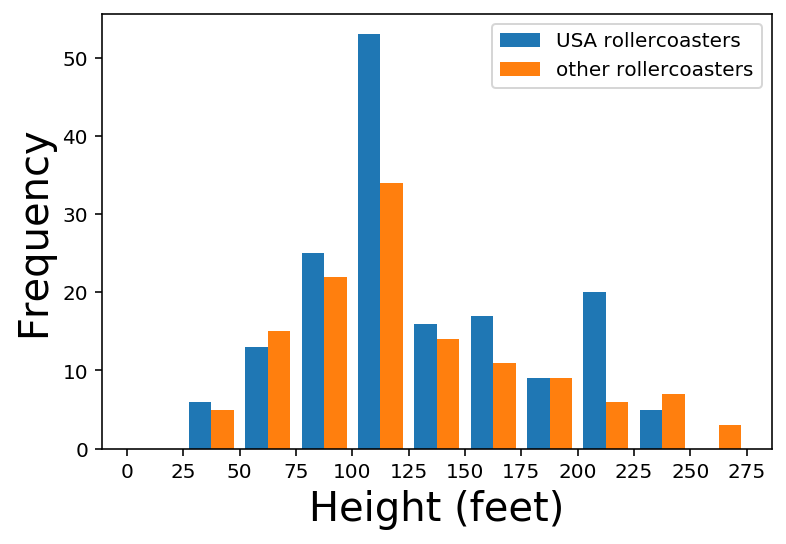

In [11]:
usa = rc[rc['Country/Region'] == 'United States']['Height (feet)']
world = rc[rc['Country/Region'] != 'United States']['Height (feet)']
plt.hist([usa, world], np.arange(0, 300, 25), label = ['USA rollercoasters', 'other rollercoasters'])
plt.xlabel('Height (feet)', size=20)
plt.ylabel('Frequency', size=20)
plt.xticks(np.arange(0,300,25))
plt.legend()
plt.show()



(5) What's the relationship between speed and height

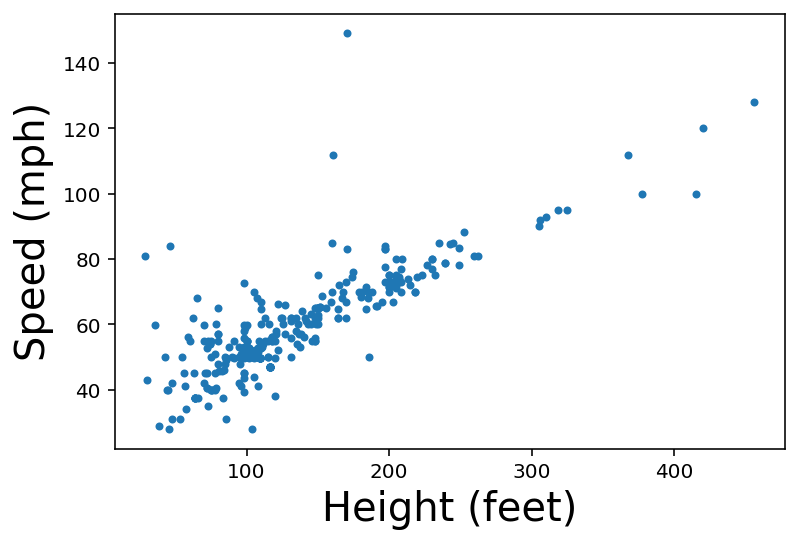

In [12]:
plt.plot(rc['Height (feet)'],rc['Speed (mph)'],'.')
plt.xlabel('Height (feet)', size=20)
plt.ylabel('Speed (mph)', size=20)

plt.show()







This graph visually appears to resemble the shape of a linear relationship. So we try to find the best fit line and plot it again.



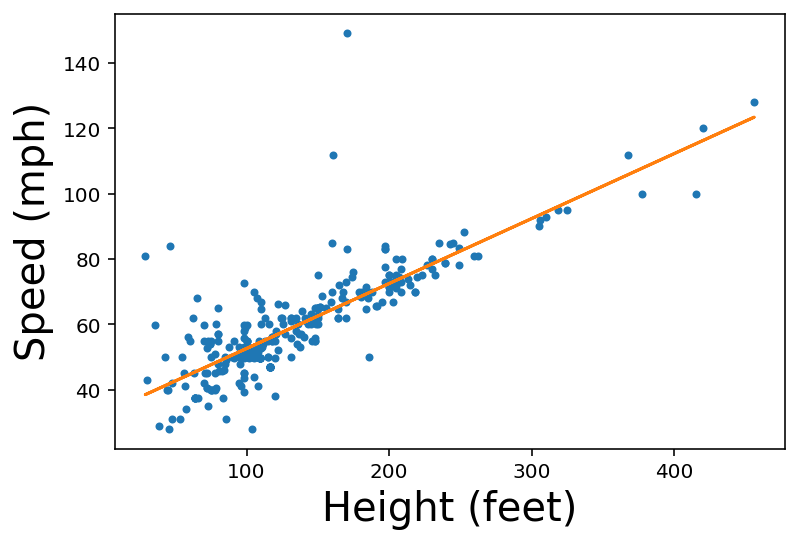

32.71103724715578 0.19898991240458277


In [13]:
plt.plot(rc['Height (feet)'],rc['Speed (mph)'],'.')
plt.xlabel('Height (feet)', size=20)
plt.ylabel('Speed (mph)', size=20)

b, m = polyfit(rc['Height (feet)'],rc['Speed (mph)'],1)
plt.plot(rc['Height (feet)'], b+m*rc['Height (feet)'], '-')
plt.show()
print(b,m)


(6) What's the relationship between length and speed?

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

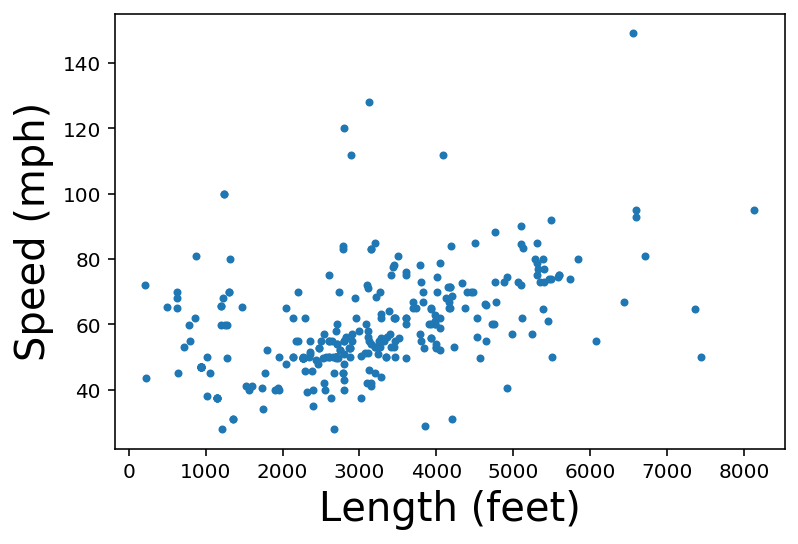

In [14]:
plt.plot(rc['Length (feet)'],rc['Speed (mph)'],'.')
plt.xlabel('Length (feet)', size=20)
plt.ylabel('Speed (mph)', size=20)
plt
#The distributino seems to be pretty irregular

Now it's time to start looking into the CoasterBuzz rankings.

In [15]:
rc_ranking = rc[rc['CoasterBuzz Ranking'].isnull() == False]

rc_ranking['CoasterBuzz Ranking'].value_counts().sort_index()








3.84483    1
3.85625    1
3.88750    1
3.92529    1
3.92784    1
          ..
4.77295    1
4.81132    1
4.82984    1
4.86473    1
4.95378    1
Name: CoasterBuzz Ranking, Length: 68, dtype: int64

Firstly, see if the distribution of CoasterBuzz Ranking seems normal.

Text(0.5, 1.0, 'CoasterrBuzz Ranking Distribution')

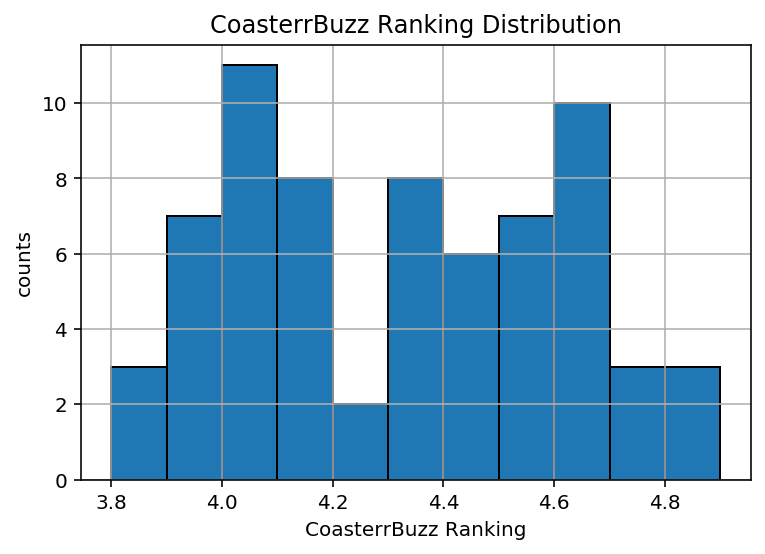

In [16]:
hist = rc_ranking['CoasterBuzz Ranking'].hist(edgecolor="black", bins=np.arange(3.8,4.9,0.1))
plt.xlabel('CoasterrBuzz Ranking')
plt.ylabel('counts')
plt.title('CoasterrBuzz Ranking Distribution')

It appears bimodal, so the parametric statistic analysis doesn't quite apply to it.


Now let's assess the bivariate associations between the ranking and each of the numerical variable.

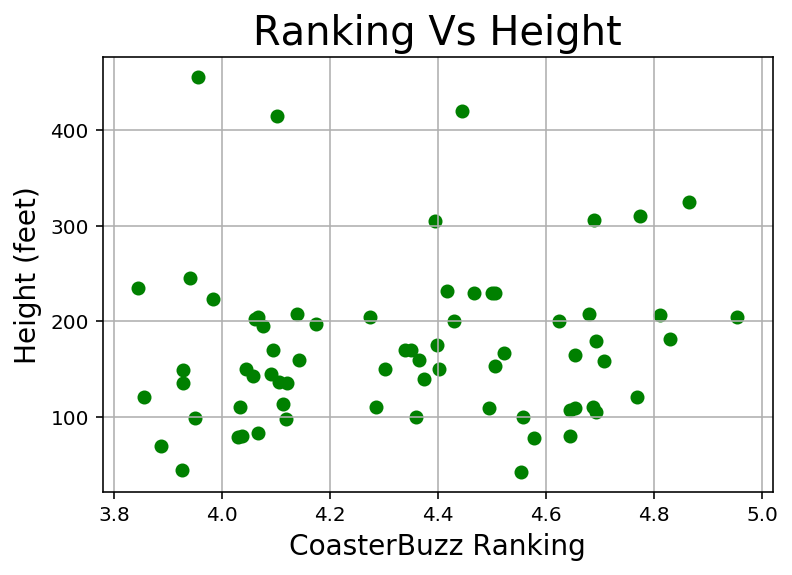

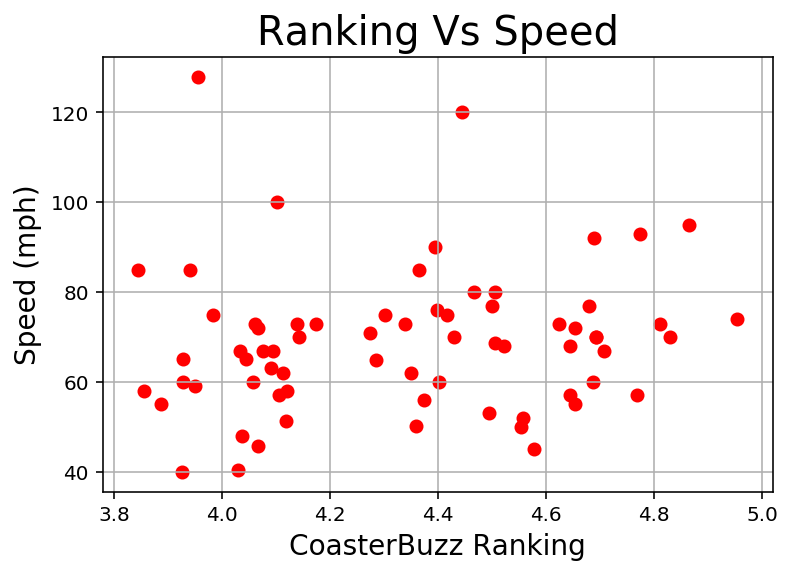

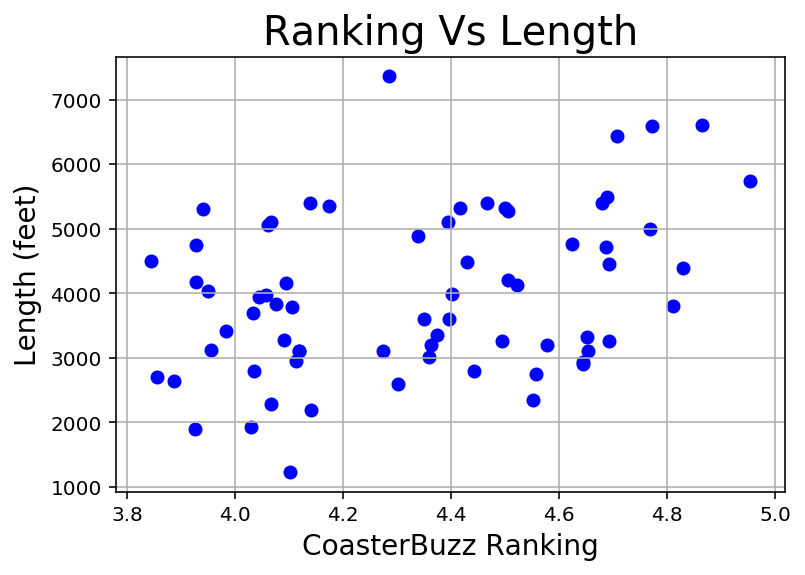

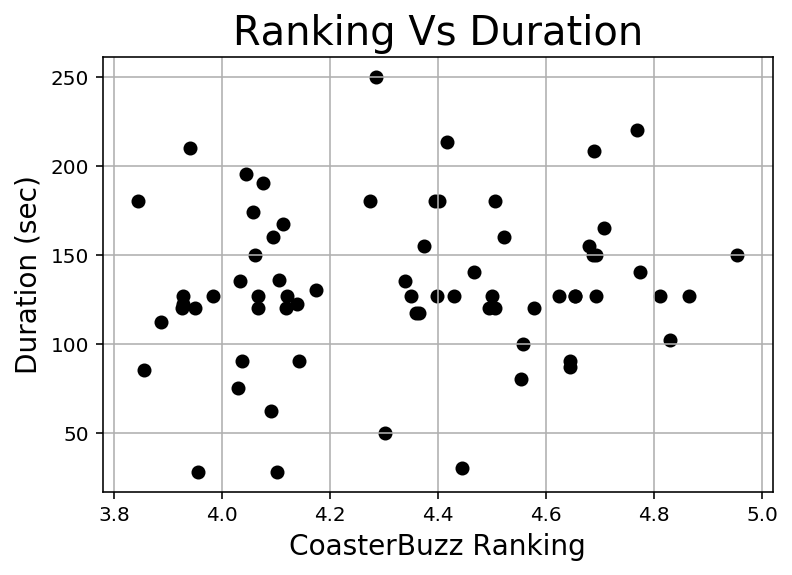

In [17]:
plt.scatter(rc_ranking['CoasterBuzz Ranking'], rc_ranking['Height (feet)'], color='green')
plt.title('Ranking Vs Height', fontsize=20)
plt.xlabel('CoasterBuzz Ranking', fontsize=14)
plt.ylabel('Height (feet)', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(rc_ranking['CoasterBuzz Ranking'], rc_ranking['Speed (mph)'], color='red')
plt.title('Ranking Vs Speed', fontsize=20)
plt.xlabel('CoasterBuzz Ranking', fontsize=14)
plt.ylabel('Speed (mph)', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(rc_ranking['CoasterBuzz Ranking'], rc_ranking['Length (feet)'], color='blue')
plt.title('Ranking Vs Length', fontsize=20)
plt.xlabel('CoasterBuzz Ranking', fontsize=14)
plt.ylabel('Length (feet)', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(rc_ranking['CoasterBuzz Ranking'], rc_ranking['Duration (sec)'], color='black')
plt.title('Ranking Vs Duration', fontsize=20)
plt.xlabel('CoasterBuzz Ranking', fontsize=14)
plt.ylabel('Duration (sec)', fontsize=14)
plt.grid(True)
plt.show()



Visually, no evidence of specific type of association is shown in any of the scatterplot.


We want to then compare the rankings between wood and steel rollercoasters.

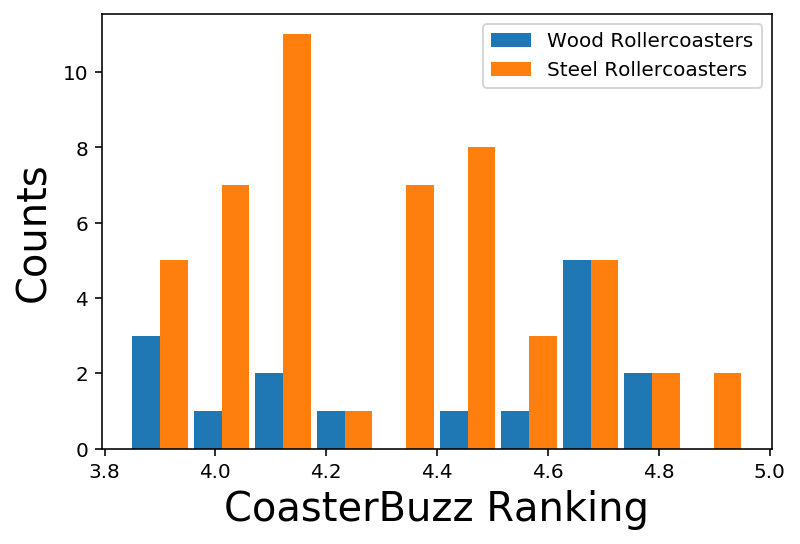

In [18]:
wood = rc_ranking[rc_ranking['Construction'] == 'Wood']
steel = rc_ranking[rc_ranking['Construction'] == 'Steel']

hist2 = plt.hist([wood['CoasterBuzz Ranking'], steel['CoasterBuzz Ranking']], rwidth = 0.9)
plt.xlabel('CoasterBuzz Ranking',size=20)
plt.ylabel('Counts',size=20)
plt.legend(['Wood Rollercoasters','Steel Rollercoasters'])
plt.show()





FORMULA: ranking = (25*(height-meanheight)^3+10*(speed-meanspeed)^5+20*(length-meanlength)^3+15*(duration-meanduration)^2)/1000

In [19]:
rc['Ranking'] = (25*(rc['Height (feet)'] - rc['Height (feet)'].mean())**3+10*(rc['Speed (mph)']-rc['Speed (mph)'].mean())**5+20*(rc['Length (feet)']-rc['Length (feet)'].mean())**3+15*(rc['Duration (sec)']-rc['Duration (sec)'].mean())**2)/99999999
rc.head()

,Name,Park,City/Region,City/State/Region,Country/Region,Geographic Region,Construction,Type,Status,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Inversions (YES or NO),Number of Inversions,Duration (sec),CoasterBuzz Ranking,Ranking
0,10 Inversion Roller Coaster,Chimelong Paradise,Panyu,"Guangzhou, Guangdong",China,Asia,Steel,Sit Down,Operating,2006,98.4,45.0,2788.8,YES,10,92.000000,NaN,-9.500789
1,Abismo,Parque de Atracciones de Madrid,Madrid,Madrid,Spain,Europe,Steel,Sit Down,Operating,2006,151.6,65.2,1476.4,YES,2,60.000000,NaN,-937.425434
2,Adrenaline Peak,Oaks Amusement Park,Portland,Oregon,United States,North America,Steel,Sit Down,Operating,2018,72.0,45.0,1050.0,YES,3,126.874439,NaN,-1852.171644
3,Afterburn,Carowinds,Charlotte,North Carolina,United States,North America,Steel,Inverted,Operating,1999,113.0,62.0,2956.0,YES,6,167.000000,4.11379,-1.461513
4,Alpengeist,Busch Gardens Williamsburg,Williamsburg,Virginia,United States,North America,Steel,Inverted,Operating,1997,195.0,67.0,3828.0,YES,6,190.000000,4.07529,62.405210


According to out ranking formula, the top 10 rollercoasters are:

In [20]:
rc = rc.sort_values(by = ['Ranking'], ascending = False)
rc = rc.reset_index(drop = True)
rc.head(10)





,Name,Park,City/Region,City/State/Region,Country/Region,Geographic Region,Construction,Type,Status,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Inversions (YES or NO),Number of Inversions,Duration (sec),CoasterBuzz Ranking,Ranking
0,Steel Dragon 2000,Nagashima Spa Land,Nagashima,"Kuwana,, Mie",Japan,Asia,Steel,Sit Down,Operating,2000,318.3,95.0,8133.2,NO,0,240.000000,NaN,24756.777484
1,Ultimate,Lightwater Valley,Ripn,"North Yorkshire, England",United Kingdom,Europe,Steel,Sit Down,Operating,1991,107.0,50.0,7442.0,NO,0,126.874439,NaN,15813.469559
2,Beast,Kings Island,Mason,Ohio,United States,North America,Wood,Sit Down,Operating,1979,110.0,64.8,7359.0,NO,0,250.000000,4.28593,14913.703869
3,Fujiyama,Fuji-Q Highland,Fujiyoshida,Yamanashi,Japan,Asia,Steel,Sit Down,Operating,1996,259.2,80.8,6708.7,NO,0,216.000000,NaN,9015.077255
4,Formula Rossa,Ferrari World Abu Dhabi,Abu Dhabi,Abu Dhabi,United Arab Emirates,Middle East,Steel,Sit Down,Operating,2010,170.6,149.1,6561.7,NO,0,126.874439,NaN,8514.456432
5,Fury 325,Carowinds,Charlotte,North Carolina,United States,North America,Steel,Sit Down,Operating,2015,325.0,95.0,6602.0,NO,0,126.874439,4.86473,8234.649791
6,Millennium Force,Cedar Point,Sandusky,Ohio,United States,North America,Steel,Sit Down,Operating,2000,310.0,93.0,6595.0,NO,0,140.000000,4.77295,8182.938069
7,Voyage,Holiday World,Santa Clause,Indiana,United States,North America,Wood,Sit Down,Operating,2006,159.0,67.0,6442.0,NO,0,165.000000,4.70667,7135.654807
8,Incredicoaster,Disney California Adventure Park,Anaheim,California,United States,North America,Steel,Sit Down,Operating,2001,120.0,55.0,6072.0,YES,1,156.000000,NaN,4989.966160
9,Desperado,Buffalo Bill's Resort & Casino,Primm,Nevada,United States,North America,Steel,Sit Down,Operating,2005,209.0,80.0,5843.0,NO,0,163.000000,NaN,3906.771442


In [21]:
print(list(rc[rc.index < 10].Name))

['Steel Dragon 2000', 'Ultimate', 'Beast', 'Fujiyama', 'Formula Rossa', 'Fury 325', 'Millennium Force', 'Voyage', 'Incredicoaster', 'Desperado']


And the top 10 rollercoasters in CoasterBuzz Ranking system are as follows:

In [22]:
rc_ranking= rc_ranking.sort_values(by = ['CoasterBuzz Ranking'], ascending = False)
rc_ranking = rc_ranking.reset_index(drop = True)
print(list(rc_ranking[rc_ranking.index < 10].Name))


['Steel Vengeance', 'Fury 325', 'El Toro', 'Lightning Rod', 'Millennium Force', 'Twisted Colossus', 'Voyage', 'Iron Rattler', 'Maverick', 'Leviathan']


There are three overlapping rollercoasters between our top 10 and theirs.